## Hacker Statistics

In [48]:
# Hacker statistics: simulated repeated measurments to compute probabilities
import numpy as np
import random
np.random.seed()
np.random.randint(2, size=4)

array([0, 1, 0, 1])

In [49]:
n_all_heads = 0
for trial in range(10000):
    heads = sum(np.random.randint(2, size=4))
    if heads == 4:
        n_all_heads += 1
n_all_heads/10000

0.0575

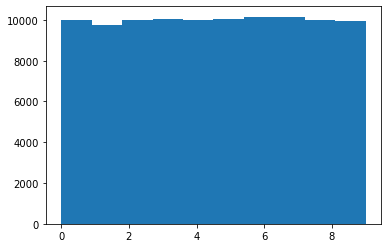

In [50]:
import matplotlib.pyplot as plt
random_numbers = np.empty(100000)
for i in range(100000):
    random_numbers[i] = np.random.randint(10)
plt.hist(random_numbers, bins=10)
plt.show()

## Probability Distributions

In [51]:
# Distrubition functions = mathematical representation of outcomes

# We can compute these distributions to model what we can expect if there is no signal. If the model 
# is a poor fit, we can reject the idea that the results are due to random chance. 

### Binomial Distribution

In [52]:
# Bernoulli trials follow a binomial distribution
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p and return number of successes."""
    n_success = 0
    for i in range(n):
        random_number = np.random.random()
        if random_number < p:
            n_success += 1
    return n_success

In [53]:
perform_bernoulli_trials(100, 0.05)

5

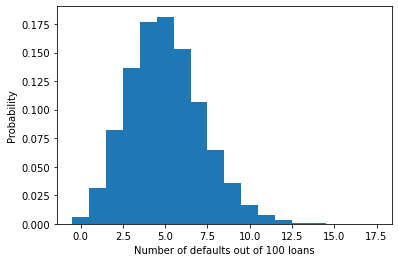

In [54]:
# Bank loans simulation: if probability p of default is 0.05, we might want to know the probability of getting
# certain number of defaults after 100 loans
n_defaults = np.empty(100000)
for i in range(100000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)

bins = np.arange(0, max(n_defaults) + 1.5) - 0.5
plt.hist(n_defaults, density=True, bins=bins)
plt.xlabel('Number of defaults out of 100 loans')
plt.ylabel('Probability')
plt.show()

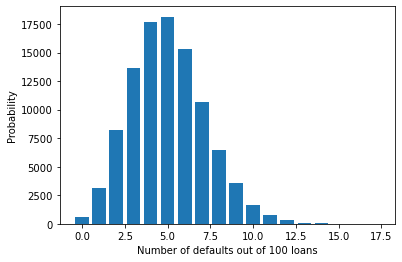

In [55]:
# If we want to use a bar plot, we can use np.unique, which is similar to value_counts() for np.arrays
values, counts = np.unique(n_defaults, return_counts=True)
plt.bar(values, counts)
plt.xlabel('Number of defaults out of 100 loans')
plt.ylabel('Probability')
plt.show()

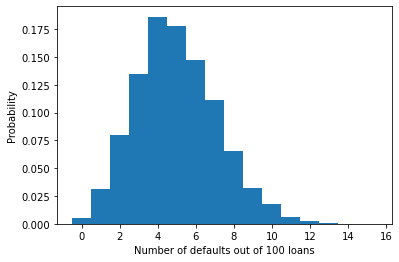

In [56]:
# Bernouli trials can also be performed with the random library!
n_defaults = np.random.binomial(100, 0.05, size=10000)
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5
plt.hist(n_defaults, density=True, bins=bins)
plt.xlabel('Number of defaults out of 100 loans')
plt.ylabel('Probability')
plt.show()

In [57]:
# Define a function ecdf:
def ecdf(array):
    x = np.sort(array)
    n = x.size
    y = np.arange(1, n+1) / n
    return (x, y)

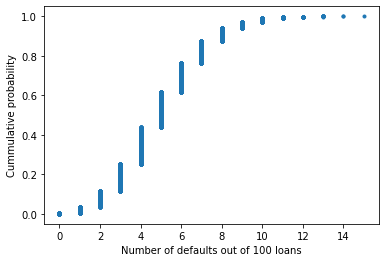

In [58]:
x, y = ecdf(n_defaults)
plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel('Number of defaults out of 100 loans')
plt.ylabel('Cummulative probability')
plt.show()

### Poisson Distribution

In [59]:
# Poisson process: 
# The timing of the next event is completely independent of the previous event happened
# The rate at which the events occur is constant

# Poisson distribution: limit of binomial distribution for low probability and 
# large number of trials (rare events)

# Mean = variance! so, std is sqrt(mean)

In [60]:
np.random.poisson(5, 10000)

array([5, 7, 8, ..., 4, 2, 3])

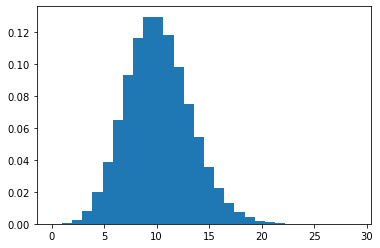

In [61]:
normal_sample = np.random.poisson(10, 1000000)
plt.hist(normal_sample, bins=30, density='True')
plt.show()

In [62]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, 10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], 10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))


Poisson:      9.9727 3.1763114944853883
n = 20 Binom: 10.0018 2.2261618898903106
n = 100 Binom: 10.0133 2.970946500696369
n = 1000 Binom: 10.0343 3.149527505833216


### Normal Distribution

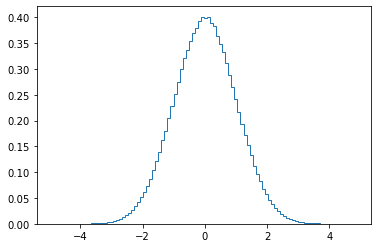

In [63]:
# Normal distribution:
normal_sample = np.random.normal(0, 1, 1000000)
plt.hist(normal_sample, bins=100, density=True, histtype='step')
plt.show()

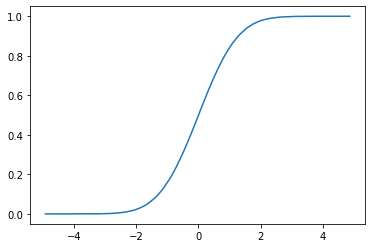

In [64]:
x, y = ecdf(normal_sample)
plt.plot(x, y)
plt.show()

In [65]:
import pandas as pd
df = pd.read_csv("../datasets/speed_of_light.csv")

In [66]:
sol = df["velocity of light in air (km/s)"]
mu, sigma = np.mean(sol), np.std(sol)
normal_sample = np.random.normal(mu, sigma, len(sol))

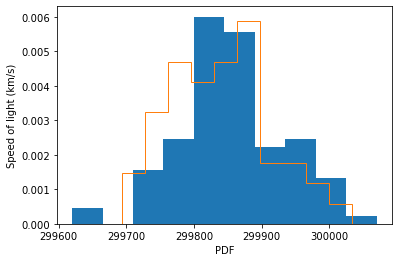

In [67]:
import seaborn as sns
plt.hist(sol, density=True, bins=10)
plt.hist(normal_sample, density=True, bins=10, histtype='step')
plt.xlabel("PDF")
plt.ylabel("Speed of light (km/s)")
plt.show()

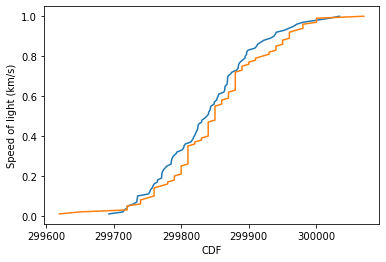

In [68]:
x, y = ecdf(sol)
x_theor, y_theor = ecdf(normal_sample)
plt.plot(x_theor, y_theor)
plt.plot(x, y)
plt.xlabel("CDF")
plt.ylabel("Speed of light (km/s)")
plt.show()

In [69]:
# We can see that the speed of light measurements follow a normal distribution!

### Exponential Distribution

In [70]:
# Exponential distribution
# Describes the waiting time between rare events or poisson processes (inverse of poisson)

# Poisson -> Cars passing every hour
# Exponential -> Number of waiting time between cars

# Events must happen at a constant rate, and be independent with each other: memoryless

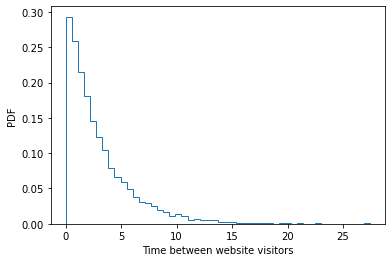

In [71]:
exponential_sample = np.random.exponential(3, 10000)
plt.hist(exponential_sample, bins=50, density=True, histtype="step")
plt.xlabel('Time between website visitors')
plt.ylabel('PDF')
plt.show()
# p at t0 is largest because p at t1 includes not arriving at t0 plus arriving at t01!


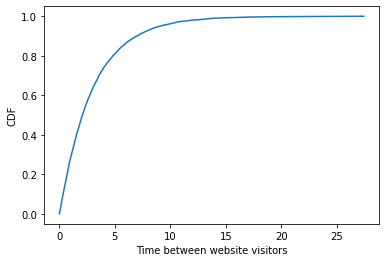

In [72]:
x, y = ecdf(exponential_sample)
plt.plot(x, y)
plt.xlabel('Time between website visitors')
plt.ylabel('CDF')
plt.show()

In [73]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau1, size)

    return t1 + t2

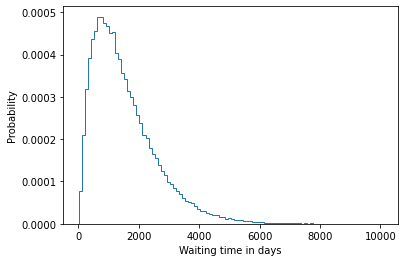

In [74]:
# Draw samples of waiting times
waiting_times = successive_poisson(764, 715, 100000)

# Plot the histogram
plt.hist(waiting_times, bins=100, density=True, histtype="step")
plt.xlabel("Waiting time in days")
plt.ylabel("Probability")
plt.show()

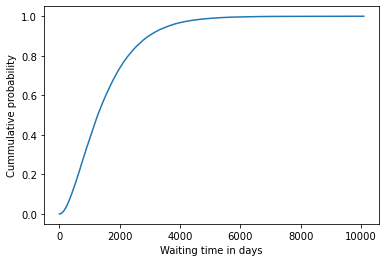

In [75]:
x, y = ecdf(waiting_times)
plt.plot(x, y)
plt.xlabel("Waiting time in days")
plt.ylabel("Cummulative probability")
plt.show()

### Central Limit Theorem

In [76]:
# Central limit theorem: the means of any distribution form a normal distribution

# In order to be true, the rule of thumb says that we need a sample size of at least 30


## Parameter Optimization

In [77]:
# Linear regression by least squares

election = pd.read_csv("../datasets/election_data.csv")
election.head()

,state,county,total_votes,dem_votes,rep_votes,other_votes,dem_share,east_west
0,AK,"State House District 8, Denali-University",10320,4995,4983,342,50.06,west
1,AK,"State House District 37, Bristol Bay-Aleuti",4665,1868,2661,136,41.24,west
2,AK,"State House District 12, Richardson-Glenn H",7589,1914,5467,208,25.93,west
3,AK,"State House District 13, Greater Palmer",11526,2800,8432,294,24.93,west
4,AK,"State House District 14, Greater Wasilla",10456,2132,8108,216,20.82,west


[[1.         0.86969365]
 [0.86969365 1.        ]]
[5.05878522e-01 7.85968421e+03]


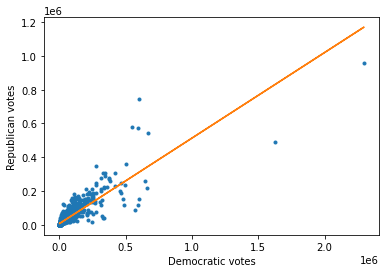

In [78]:
print(np.corrcoef(election.dem_votes, election.rep_votes))

linregress = np.polyfit(election.dem_votes, election.rep_votes, 1)
trend = np.poly1d(linregress)
print(linregress)

plt.plot("dem_votes", "rep_votes", data=election, marker=".", linestyle="none")
plt.plot(election.dem_votes, trend(election.dem_votes))
plt.xlabel("Democratic votes")
plt.ylabel("Republican votes")
plt.show()

In [79]:
# A linear model is a parametric estimate: makes assumptions about the probability distribution 
# underlying the data

## Generating Bootsrap Replicates

In [80]:
# Bootsrapping: using resampled data to perform statistical inference

# Boostrap sample: resampled array of data
# Boostrap replicate: value of the summary statistic computed from a resampled array

In [81]:
print(np.mean(sol))
print(np.median(sol))
print(np.std(sol))
print("------")
bs_sample = np.random.choice(sol, size=100)
print(np.mean(bs_sample))
print(np.median(bs_sample))
print(np.std(bs_sample))

299852.4
299850.0
78.61450247886843
------
299876.8
299880.0
65.81610745098801


In [82]:
sol

0     299850
1     299740
2     299900
3     300070
4     299930
       ...  
95    299940
96    299950
97    299800
98    299810
99    299870
Name: velocity of light in air (km/s), Length: 100, dtype: int64

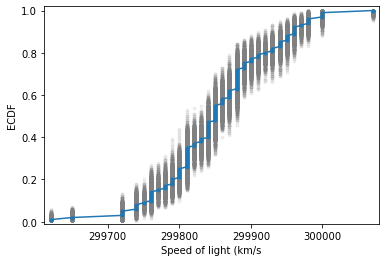

In [83]:
for _ in range(1000):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(sol, size=len(sol))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(sol)
plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
plt.xlabel('Speed of light (km/s')
plt.ylabel('ECDF')

# Show the plot
plt.show()

Confidence Interval:  [299836.9975 299867.7   ]


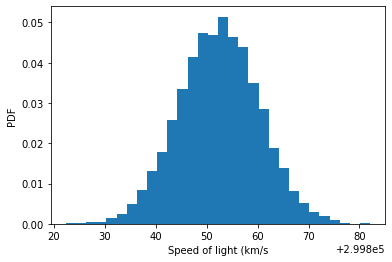

In [84]:
# Bootstrap Confidence Intervals 
bs_replicates = np.empty(10000)
for i in range(10000):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(sol, size=len(sol))
    bs_replicates[i] = np.mean(bs_sample)

confidence_interval = np.percentile(bs_replicates, [2.5, 97.5])
print("Confidence Interval: ", confidence_interval)

plt.hist(bs_replicates, bins=30, density=True)
plt.xlabel('Speed of light (km/s')
plt.ylabel('PDF')
plt.show()

### Pairs Bootstrap for Linear Regression

In [85]:
# Resample data in pairs
# Compute slope and intercept from resampled data, each is a bootsrap replicate
# Compute CI from percentiles of bootsrap replicates

In [86]:
inds = np.arange(len(election.dem_votes))
bs_inds = np.random.choice(inds, len(inds))

bs_dem_votes = election.dem_votes[bs_inds]
bs_rep_votes = election.rep_votes[bs_inds]

[5.13842491e-01 7.69999296e+03]


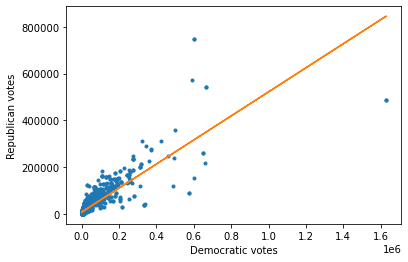

In [87]:
linregress = np.polyfit(bs_dem_votes, bs_rep_votes, 1)
trend = np.poly1d(linregress)
print(linregress)

plt.plot(bs_dem_votes, bs_rep_votes, marker=".", linestyle="none")
plt.plot(bs_dem_votes, trend(bs_dem_votes))
plt.xlabel("Democratic votes")
plt.ylabel("Republican votes")
plt.show()

In [88]:
size = 1000
inds = np.arange(len(election.dem_votes))
bs_slope_reps = np.empty(size)
bs_intercept_reps = np.empty(size)

for i in range(size):
        bs_inds = np.random.choice(inds, len(inds))
        bs_dem_votes, bs_rep_votes = election.dem_votes[bs_inds], election.rep_votes[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_dem_votes, bs_rep_votes, 1)


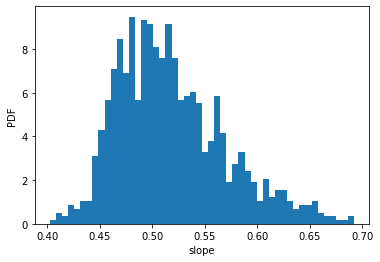

In [89]:
plt.hist(bs_slope_reps, bins=50, density=True)
plt.xlabel('slope')
plt.ylabel('PDF')
plt.show()

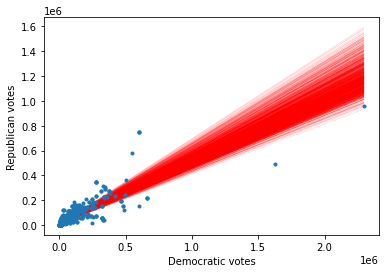

In [90]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, election.dem_votes.max()])

# Plot the bootstrap lines
for i in range(len(bs_slope_reps)):
    plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i], linewidth=0.5, alpha=0.2, color='red')

plt.plot(bs_dem_votes, bs_rep_votes, marker=".", linestyle="none")
plt.xlabel("Democratic votes")
plt.ylabel("Republican votes")
plt.show()

## Hypothesis Testing

In [91]:
# How reasonable the observed data is assuming a certain hypothesis is true?
# Comparing our data with the null hypothesis: assume that 2 quantities are identically distributed, and simulate
# what the distribution looks like
# The null hypothesis is rejected if its probability falls down to a determinate level, usually 5%. 

In [141]:
# Pipeline for null hypothesis:
# 1. Clearly state the null hypothesis
# 2. Define test statistic
# 3. Generate sets of simulated data assuming the null hypothesis is true
# 4. Compute test statistic for each simulated data set
# 5. P-value is the fraction of data sets for which the test statistic is at least as extreme as for the real one 

In [92]:
# Hypothesis test 1: Permutation
# Merge 2 quantities and randomly reorder of entries of the combined array.
# To get a p-value, we randomly sample (without replacement) possible permutations of our variable of interest. 
# The p-value is the proportion of samples that have a test statistic larger than that of our observed data

In [95]:
ohio = election[election["state"] == "OH"]
pennsylvania = election[election["state"] == "PA"]

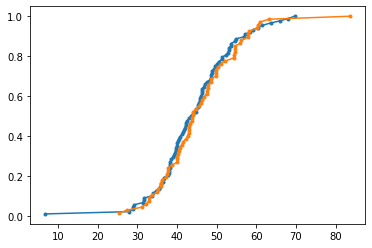

In [119]:
x_OH, y_OH = ecdf(ohio.dem_share)
x_PA, y_PA = ecdf(pennsylvania.dem_share)
plt.plot(x_OH, y_OH, marker='.')
plt.plot(x_PA, y_PA, marker='.')
plt.show()

In [112]:
ohio.dem_share.describe() - pennsylvania.dem_share.describe()

count    21.000000
mean     -1.158236
std       0.092671
min     -18.540000
25%      -1.070000
50%      -0.355000
75%      -0.950000
max     -13.920000
Name: dem_share, dtype: float64

In [ ]:
# Hypothesis: do PA and OH have the same distribution? We can use permutation to evaluate the null hypothesis!

0.050932157394844066


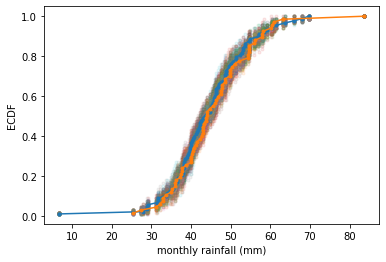

In [138]:
both_dem_share = pd.concat([ohio.dem_share, pennsylvania.dem_share])
means = np.empty(100)

for i in range(0, 100):
    perm_dem_share = np.random.permutation(both_dem_share)
    OH_perm_sample = perm_dem_share[:len(ohio.dem_share)]
    PA_perm_sample = perm_dem_share[len(ohio.dem_share):]
    means[i] = np.mean(OH_perm_sample) - np.mean(PA_perm_sample)
    x_OH_perm, y_OH_perm = ecdf(OH_perm_sample)
    x_PA_perm, y_PA_perm = ecdf(PA_perm_sample)
    plt.plot(x_OH_perm, y_OH_perm, marker='.', linestyle="none", alpha=0.1)
    plt.plot(x_PA_perm, y_PA_perm, marker='.', linestyle="none", alpha=0.1)

x_OH, y_OH = ecdf(ohio.dem_share)
x_PA, y_PA = ecdf(pennsylvania.dem_share)
plt.plot(x_OH, y_OH, marker='.')
plt.plot(x_PA, y_PA, marker='.')
plt.xlabel('monthly rainfall (mm)')
plt.ylabel('ECDF')
plt.show()
plt.show()

In [140]:
# The perumations overlap the data. We cannot reject the null hypothesis. We can't 
# reject that they are identically distributed. 

In [139]:
empirical_diff_mean = np.mean(ohio.dem_share) - np.mean(pennsylvania.dem_share)
p = np.sum(means >= empirical_diff_mean) / len(means)

# Print the result
print('p-value =', p)

p-value = 0.76


In [ ]:
# The p-value tells us that there is about a 76% chance that we would 
# get the difference of means observed in the experiment if the distributions were exactly the same.